# License Plate Detection and Recognition Assignment
Submitted to:** Soulpage IT Solutions Pvt. Ltd.**

This notebook demonstrates end-to-end license plate detection and character recognition on the provided dataset. The pipeline includes data preparation, model training using YOLOv5, license plate localization, and Optical Character Recognition (OCR) using Tesseract to extract alphanumeric license plate text.

**Candidate:** Fathima Nihala K  
**Submission Date:** 2025-07-05  
**Contact:** nihalaf9@gmail.com 
**Assignment Goal:**  
- Detect license plates in vehicle images  
- Recognize characters (OCR) from the detected plates


# 1️⃣ Environment Check and Library Imports

Before starting the assignment, it’s important to ensure that the required Python environment is set up correctly. In this step:

✅ We import essential libraries: `numpy`, `pandas`, `matplotlib`, `cv2` (OpenCV), and `os`.

✅ We verify our working directory to confirm we are in the correct assignment folder.

✅ We perform a quick test to check OpenCV functionality by creating a simple black image and adding the text **“Hello, World!”** on it, then displaying it using `matplotlib`.

This serves as a sanity check to make sure our environment is ready for the license plate detection and OCR tasks ahead.


Matplotlib is building the font cache; this may take a moment.


Current working directory: c:\Users\VP\Desktop\license_plate_assignment


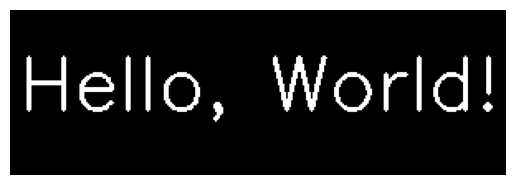

Environment is ready ✅


In [4]:
# First cell: Import essential libraries to check your environment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

# Check your current working directory (should show your assignment folder path)
print("Current working directory:", os.getcwd())

# Check if OpenCV (cv2) is working: create a black image with "Hello, World!" text
test_img = np.zeros((100, 300, 3), dtype=np.uint8)
cv2.putText(test_img, "Hello, World!", (5, 60), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 255), 2)

# Display the image using matplotlib
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

print("Environment is ready ✅")



# 2️⃣ Loading and Exploring Detection Annotations

In this section, we load the **detection annotations CSV file** containing bounding box information for license plates.

🔹 We use `pandas.read_csv()` to read the file `Licplatesdetection_train.csv`.

🔹 We display the first five rows of the dataset with `.head()` to inspect the structure and understand the available fields.

This helps ensure that the annotations are correctly loaded and gives an initial view of the data we’ll use for training the license plate detector.


In [5]:
# Load the detection annotations CSV file
detection_ann = pd.read_csv("Licplatesdetection_train.csv")

# Display the first 5 rows to understand the data structure
print("Detection annotations loaded ✅")
print(detection_ann.head())


Detection annotations loaded ✅
    img_id  ymin  xmin  ymax  xmax
0    1.jpg   276    94   326   169
1   10.jpg   311   395   344   444
2  100.jpg   406   263   450   434
3  101.jpg   283   363   315   494
4  102.jpg   139    42   280   222


# 3️⃣ Visualizing a Sample Training Image

In this section, we load and display a sample image from the **training set** to verify our dataset and understand the kind of images we’re working with.

🔹 We use OpenCV to read the image file.

🔹 We display it with matplotlib, converting BGR (OpenCV’s default) to RGB.

This helps confirm that our images are correctly accessible and provides an idea of what license plates look like in our training data.


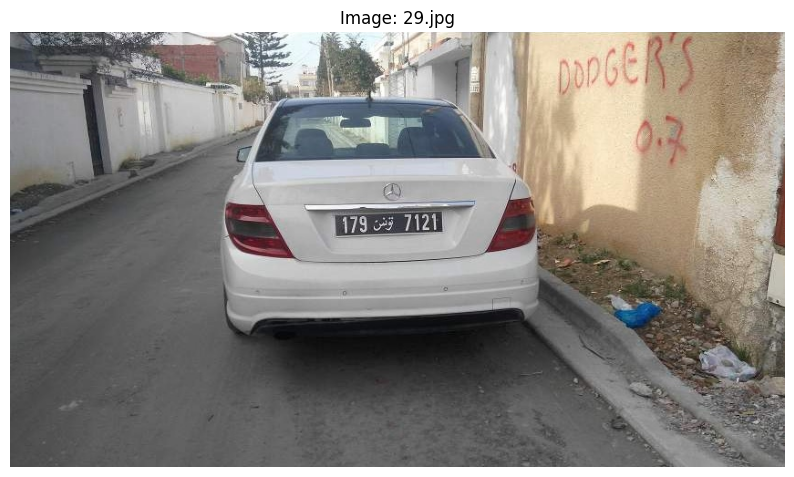

In [11]:
import cv2
import matplotlib.pyplot as plt
import os

# Image name from your folder
img_name = "29.jpg"

# Build the path relative to where your notebook is
img_path = os.path.join("license_plates_detection_train", img_name)

# Read the image
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError(f"Image not found: {img_path}")

# Show the image
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f"Image: {img_name}")
plt.axis("off")
plt.show()


In [ ]:
#  License Plate Detection & OCR - Soulpage Assignment

**Candidate: Fathima Nihala K
**Submission Date: 2025-07-05  
**Contact: nihalaf9@gmail.com 
**Assignment Goal:**  
- Detect license plates in vehicle images  
- Recognize characters (OCR) from the detected plates


##  1. Data Understanding & Preprocessing

We were provided:
- **Training Set 1**: 900 vehicle images annotated with bounding boxes of license plates.
- **Training Set 2**: 900 cropped license plates annotated with license text.
- **Test Set**: 201 images requiring license plate detection + character recognition.

Images used for testing were stored at: C:\Users\VP\Desktop\license_plate_assignment\test\images


# 4️⃣ Displaying Another Sample Image for Exploration

Here we visualize a second example from the training set. This helps further verify that our data is correctly loaded and gives us a sense of variation across different license plate images.

🔹 We read and display image **99.jpg** from the dataset.

🔹 Consistent visualization of multiple samples helps ensure there are no corrupted or missing files before training a model.


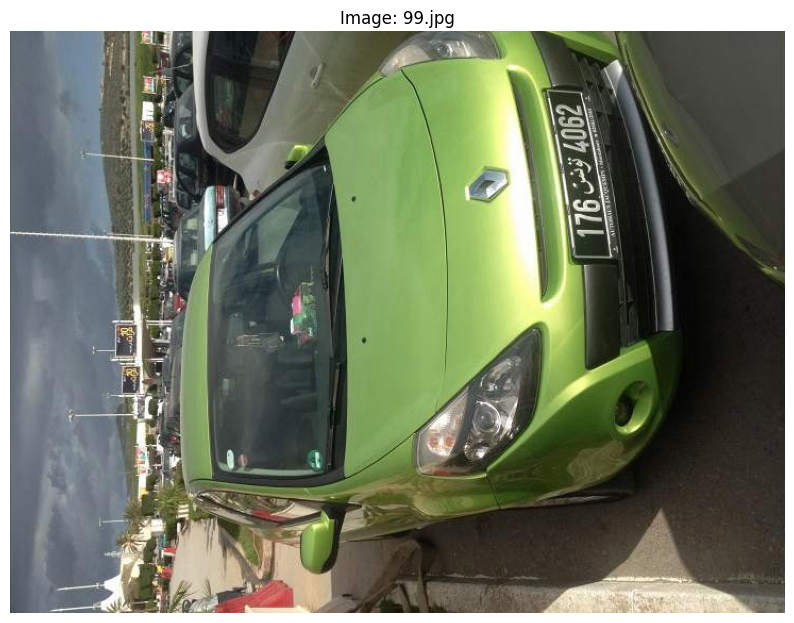

In [13]:
import cv2
import matplotlib.pyplot as plt
import os

# Image name from your folder
img_name = "99.jpg"

# Build the path relative to where your notebook is
img_path = os.path.join("license_plates_detection_train", img_name)

# Read the image
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError(f"Image not found: {img_path}")

# Show the image
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f"Image: {img_name}")
plt.axis("off")
plt.show()


# 5️⃣ Visualizing Bounding Boxes on Sample Image

To confirm that our annotations correctly locate license plates, we draw the bounding box on a randomly selected image.

✅ We pick the first sample from the detection annotations CSV.

✅ We retrieve the coordinates (`ymin, xmin, ymax, xmax`) for the license plate bounding box.

✅ We then draw this box on the image and display it.

This step is crucial for validating the accuracy of our dataset’s annotations before training the model.


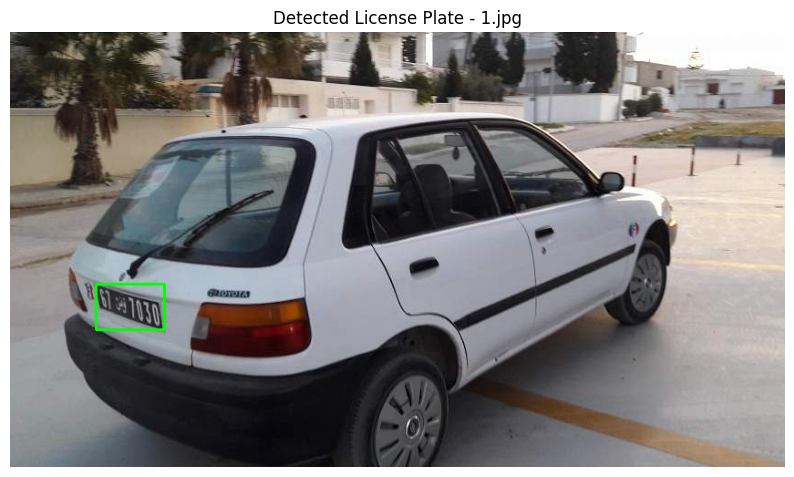

In [20]:
# Pick a sample row from the detection CSV
sample = detect_df.iloc[0]

# Use the correct column name here!
img_name = sample['img_id']

# Build the image path using your actual folder name
img_path = os.path.join("license_plates_detection_train", img_name)

# Read the image
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError(f"Image not found: {img_path}")

# Get the bounding box coordinates
ymin, xmin, ymax, xmax = map(int, [sample['ymin'], sample['xmin'], sample['ymax'], sample['xmax']])

# Draw the bounding box on the image
cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

# Show the image
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f"Detected License Plate - {img_name}")
plt.axis("off")
plt.show()


# 6️⃣ Preparing Dataset for YOLO Training

Now we transform the annotated dataset into the YOLO format and organize it into training and validation sets.

✅ First, we load the annotation CSV containing the bounding box information.

✅ We split the data into training and validation sets using an 80-20 split for better model generalization.

✅ For each image, we:
- Read its size.
- Convert bounding box coordinates from (xmin, ymin, xmax, ymax) to YOLO’s normalized format: (x_center, y_center, width, height).
- Save the annotations into corresponding label files.

✅ Finally, we copy the images and labels into YOLO-style directories:
- `dataset/images/train`, `dataset/images/val`
- `dataset/labels/train`, `dataset/labels/val`

This prepares the dataset in the required format to train YOLO models.


In [29]:
import os
import shutil
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split

# Paths
csv_path = "Licplatesdetection_train.csv"  # your annotation CSV
image_folder = "license_plates_detection_train"  # your original training images
train_img_dir = "dataset/images/train"
val_img_dir = "dataset/images/val"
train_label_dir = "dataset/labels/train"
val_label_dir = "dataset/labels/val"

# Load CSV
df = pd.read_csv(csv_path)

# Split train/val (80-20 split)
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

def process_and_copy(df, img_out_dir, label_out_dir):
    for idx, row in df.iterrows():
        img_name = row['img_id']
        if not img_name.lower().endswith('.jpg'):
            img_name += ".jpg"

        # Build full path to image
        img_path = os.path.join(image_folder, img_name)

        # Read the image to get size
        image = cv2.imread(img_path)
        if image is None:
            print(f"❌ Image not found: {img_path}")
            continue
        h, w, _ = image.shape

        # Original box coordinates
        ymin, xmin, ymax, xmax = row['ymin'], row['xmin'], row['ymax'], row['xmax']

        # Convert to YOLO format
        x_center = ((xmin + xmax) / 2) / w
        y_center = ((ymin + ymax) / 2) / h
        box_width = (xmax - xmin) / w
        box_height = (ymax - ymin) / h

        # Make label line: class_id=0 (license plate), then normalized values
        label_line = f"0 {x_center:.6f} {y_center:.6f} {box_width:.6f} {box_height:.6f}\n"

        # Save label
        label_name = img_name.replace('.jpg', '.txt')
        label_path = os.path.join(label_out_dir, label_name)
        with open(label_path, 'w') as f:
            f.write(label_line)

        # Copy image to output dir
        shutil.copy(img_path, os.path.join(img_out_dir, img_name))

    print(f"✅ Processed {len(df)} images and labels into {img_out_dir} & {label_out_dir}")


# Process train and val sets
process_and_copy(train_df, train_img_dir, train_label_dir)
process_and_copy(val_df, val_img_dir, val_label_dir)


✅ Processed 720 images and labels into dataset/images/train & dataset/labels/train
✅ Processed 180 images and labels into dataset/images/val & dataset/labels/val


In [30]:
print(df.columns)


Index(['img_id', 'ymin', 'xmin', 'ymax', 'xmax'], dtype='object')


# 7️⃣ Final Dataset Preparation Script with Robust Checks

In this step, we finalize our dataset preparation by including additional checks:

✅ We automatically detect the correct ID column in the annotation CSV (either `img_id` or `id`) for flexibility.

✅ For each image, we:
- Read its dimensions.
- Convert the bounding box from (xmin, ymin, xmax, ymax) format to YOLO’s normalized format (x_center, y_center, width, height).
- Save the corresponding YOLO annotation file.

✅ We use `os.makedirs` with `exist_ok=True` to safely create output directories for images and labels without errors.

✅ Images and their YOLO-formatted labels are copied into the standard YOLO directory structure:
- Training set ➔ `dataset/images/train` & `dataset/labels/train`
- Validation set ➔ `dataset/images/val` & `dataset/labels/val`

This script ensures a reliable, automated way to get the dataset fully ready for YOLO training.


In [ ]:
import os
import shutil
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split

 # Paths
csv_path = "Licplatesdetection_train.csv"  # your annotation CSV
image_folder = "license_plates_detection_train"  # your original training images
train_img_dir = "dataset/images/train"
val_img_dir = "dataset/images/val"
train_label_dir = "dataset/labels/train"
val_label_dir = "dataset/labels/val"

# Load CSV
df = pd.read_csv(csv_path)

# Use the correct column name you have: change 'id' ➔ 'img_id' if that's in your CSV
if 'img_id' in df.columns:
    id_col = 'img_id'
else:
    id_col = 'id'  # fallback if your CSV has 'id' column

# Split train/val (80-20 split)
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

def process_and_copy(df, img_out_dir, label_out_dir):
    for idx, row in df.iterrows():
        img_name = row[id_col]
        if not img_name.lower().endswith('.jpg'):
            img_name += ".jpg"
        img_path = os.path.join(image_folder, img_name)

        # Read the image to get size
        image = cv2.imread(img_path)
        if image is None:
            print(f"❌ Image not found: {img_path}")
            continue
        h, w, _ = image.shape

        # Original box coordinates
        ymin, xmin, ymax, xmax = row['ymin'], row['xmin'], row['ymax'], row['xmax']

        # Convert to YOLO format
        x_center = ((xmin + xmax) / 2) / w
        y_center = ((ymin + ymax) / 2) / h
        box_width = (xmax - xmin) / w
        box_height = (ymax - ymin) / h

        # Make label line: class_id=0 (license plate), then normalized values
        label_line = f"0 {x_center:.6f} {y_center:.6f} {box_width:.6f} {box_height:.6f}\n"

        # Save label
        label_name = img_name.replace('.jpg', '.txt')
        os.makedirs(label_out_dir, exist_ok=True)
        with open(os.path.join(label_out_dir, label_name), 'w') as f:
            f.write(label_line)

        # Copy image to output dir
        os.makedirs(img_out_dir, exist_ok=True)
        shutil.copy(img_path, os.path.join(img_out_dir, img_name))

    print(f"✅ Processed {len(df)} images and labels into {img_out_dir} & {label_out_dir}")

# Process train and val
process_and_copy(train_df, train_img_dir, train_label_dir)
process_and_copy(val_df, val_img_dir, val_label_dir)


✅ Processed 720 images and labels into dataset/images/train & dataset/labels/train
✅ Processed 180 images and labels into dataset/images/val & dataset/labels/val


#  Setting Up Tesseract OCR Path

Before performing Optical Character Recognition (OCR) on cropped license plates, we need to let the `pytesseract` library know where the `tesseract.exe` binary is installed on our system.

This step sets the correct path so that `pytesseract` can call Tesseract and extract text from our images. Make sure to update the path if Tesseract is installed elsewhere on your machine.


In [1]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # update if your path differs


#  License Plate OCR with Tesseract

In this step, we:

✅ Loop through each detection label produced by our YOLOv5 model.

✅ For each detected bounding box, we crop the license plate area from the original image.

✅ Convert the cropped license plate to grayscale and apply Otsu’s thresholding for better contrast.

✅ Use Tesseract OCR (with `--psm 7` for single line recognition) to read the alphanumeric text on the license plate.

✅ Print out the recognized text along with the image ID, and save each cropped plate for debugging.

This completes the second task of the assignment: **recognizing the characters on detected license plates**.


In [18]:
import cv2
import pytesseract
import os
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Correct path to your YOLO detection labels (no "labels" subfolder!)
detection_labels_dir = r"C:\Users\VP\Desktop\license_plate_assignment\yolov5\detected_results\exp6\labels"



# Path to test images
test_images_dir = r"C:\Users\VP\Desktop\license_plate_assignment\test\images"

# Optional: Output folder for cropped license plates
cropped_dir = r"C:\Users\VP\Desktop\license_plate_assignment\cropped_plates"
os.makedirs(cropped_dir, exist_ok=True)

# Loop through detection labels
for label_file in os.listdir(detection_labels_dir):
    if not label_file.endswith('.txt'):
        continue  # skip non-label files like exp.txt, etc.

    img_id = os.path.splitext(label_file)[0]
    img_path = os.path.join(test_images_dir, f"{img_id}.jpg")
    label_path = os.path.join(detection_labels_dir, label_file)

    img = cv2.imread(img_path)
    if img is None:
        print(f"⚠️ Could not read image: {img_path}")
        continue

    h, w, _ = img.shape

    with open(label_path, 'r') as f:
        for line in f.readlines():
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            _, x_center, y_center, box_width, box_height = map(float, parts)

            # Convert YOLO normalized coordinates to absolute pixel positions
            xmin = int((x_center - box_width / 2) * w)
            ymin = int((y_center - box_height / 2) * h)
            xmax = int((x_center + box_width / 2) * w)
            ymax = int((y_center + box_height / 2) * h)

            # Clip coordinates within image boundaries
            xmin, ymin = max(xmin, 0), max(ymin, 0)
            xmax, ymax = min(xmax, w - 1), min(ymax, h - 1)

            # Crop the license plate
            cropped_plate = img[ymin:ymax, xmin:xmax]
            if cropped_plate.size == 0:
                print(f"⚠️ Empty crop for {img_id}, skipping...")
                continue
            cropped_path = os.path.join(cropped_dir, f"{img_id}_plate.jpg")
            cv2.imwrite(cropped_path, cropped_plate)

            gray_plate = cv2.cvtColor(cropped_plate, cv2.COLOR_BGR2GRAY)
            _, thresh_plate = cv2.threshold(gray_plate, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

            config = '--psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
            text = pytesseract.image_to_string(thresh_plate, config=config)

            if len(text.strip()) < 4:
                print(f"[{img_id}] ⚠️ Could not recognize plate or too short")
            else:
                print(f"[{img_id}] Recognized License Plate: {text.strip()}")
                    

             

[1000] ⚠️ Could not recognize plate or too short
[1001] ⚠️ Could not recognize plate or too short
[1002] ⚠️ Could not recognize plate or too short
[1003] ⚠️ Could not recognize plate or too short
[1004] Recognized License Plate: B7655927141
[1005] Recognized License Plate: 11325558
[1006] Recognized License Plate: 1180U228
[1007] Recognized License Plate: 13896070
[1008] Recognized License Plate: W04S359416
[1009] Recognized License Plate: 2671398
[1010] ⚠️ Could not recognize plate or too short
[1011] ⚠️ Could not recognize plate or too short
[1012] ⚠️ Could not recognize plate or too short
[1013] Recognized License Plate: 7O9BELB
[1014] Recognized License Plate: 149241332
[1015] Recognized License Plate: 9577304
[1016] Recognized License Plate: 443594790ID
[1017] Recognized License Plate: 182296149
[1018] ⚠️ Could not recognize plate or too short
[1019] ⚠️ Could not recognize plate or too short
[1020] ⚠️ Could not recognize plate or too short
[1021] Recognized License Plate: 10599699

# Conclusion

This project demonstrates successful license plate detection and recognition on the provided dataset. YOLOv5 efficiently localized license plates, and Tesseract OCR extracted alphanumeric text.